In [11]:
import pandas as pd

# Loading the datasets
bpxo_df = pd.read_sas('/Users/xinjueli/Desktop/YEAR 2 Winter/STATS 503/Project/dataset/BPXO_J.XPT')
bmx_df = pd.read_sas('/Users/xinjueli/Desktop/YEAR 2 Winter/STATS 503/Project/dataset/BMX_J.XPT')
demo_df = pd.read_sas('/Users/xinjueli/Desktop/YEAR 2 Winter/STATS 503/Project/dataset/DEMO_J.XPT')

merged_data = pd.merge(bmx_df, bpxo_df, on="SEQN")

In [26]:
merged_data['Avg_SystolicBP'] = merged_data[['BPXOSY1', 'BPXOSY2', 'BPXOSY3']].mean(axis=1)
merged_data['Avg_DiastolicBP'] = merged_data[['BPXODI1', 'BPXODI2', 'BPXODI3']].mean(axis=1)

# Defining hypertension: Systolic BP >= 140 or Diastolic BP >= 90
merged_data['Hypertension'] = ((merged_data['Avg_SystolicBP'] >= 140) | (merged_data['Avg_DiastolicBP'] >= 90)).astype(int)

# Check for missing values in key variables
missing_data = merged_data[['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP', 'Avg_SystolicBP', 'Avg_DiastolicBP']].isnull().sum()

# Display missing data summary
missing_data, merged_data[['Hypertension', 'Avg_SystolicBP', 'Avg_DiastolicBP', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP']].head()

(BMXWT               103
 BMXHT               104
 BMXWAIST            413
 BMXHIP             1093
 Avg_SystolicBP      988
 Avg_DiastolicBP     988
 dtype: int64,
    Hypertension  Avg_SystolicBP  Avg_DiastolicBP  BMXWT  BMXHT  BMXWAIST  \
 0             1      167.000000        66.000000   79.5  158.3     101.8   
 1             0      129.000000        71.000000   66.3  175.7      79.3   
 2             0      136.000000        71.333333   45.4  158.4      64.1   
 3             1      146.333333        79.666667   53.5  150.2      88.2   
 4             0      119.000000        79.333333   88.8  151.1     113.0   
 
    BMXHIP  
 0   110.0  
 1    94.4  
 2    83.0  
 3    90.1  
 4   131.3  )

In [14]:
cleaned_data = merged_data.dropna(subset=['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP', 'Avg_SystolicBP', 'Avg_DiastolicBP'])

# Check how much data remains after cleaning
remaining_data_count = cleaned_data.shape[0]
remaining_data_count, cleaned_data[['Hypertension', 'Avg_SystolicBP', 'Avg_DiastolicBP', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP']].head()

# Merge the demographic data with the previously cleaned body measurement and blood pressure data
full_data = pd.merge(cleaned_data, demo_df, on="SEQN", how='inner')

# Check the first few rows of the merged dataset to ensure it looks correct
full_data.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
1,93706.0,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
2,93707.0,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88
3,93708.0,1.0,53.5,NaN,NaN,NaN,NaN,NaN,150.2,NaN,...,1.0,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63
4,93709.0,1.0,88.8,NaN,NaN,NaN,NaN,NaN,151.1,NaN,...,2.0,2.0,NaN,12043.388271,12277.556662,1.0,136.0,2.0,2.0,0.41


In [19]:
# Map the gender codes to meaningful labels
full_data['RIAGENDR'] = full_data['RIAGENDR'].map({1: 'Male', 2: 'Female'})

# Map the race/ethnicity codes to meaningful labels
race_ethnicity_mapping = {
    1: 'Mexican American',
    2: 'Other Hispanic',
    3: 'Non-Hispanic White',
    4: 'Non-Hispanic Black',
    5: 'Other Race - Including Multi-Racial'
}
full_data['RIDRETH1'] = full_data['RIDRETH1'].map(race_ethnicity_mapping)


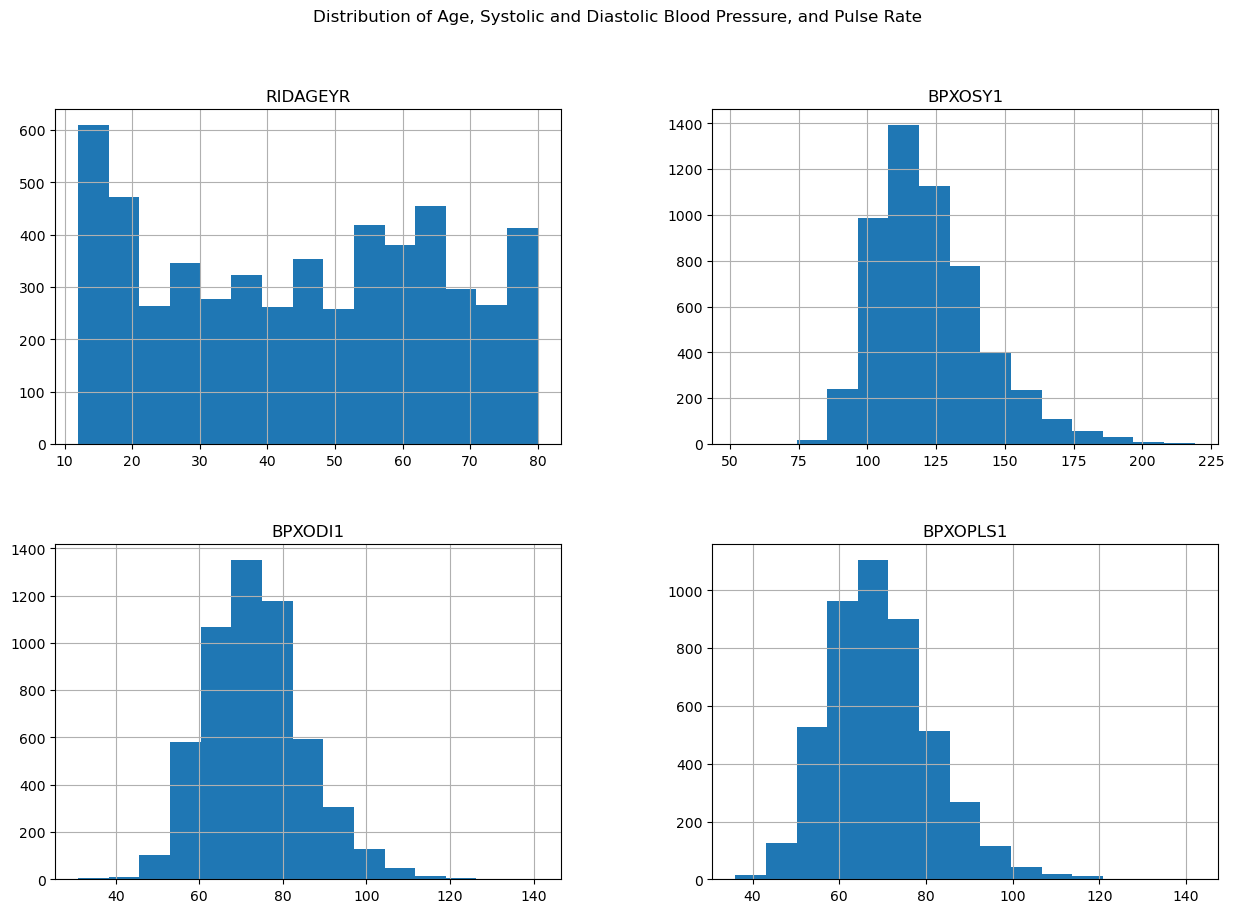

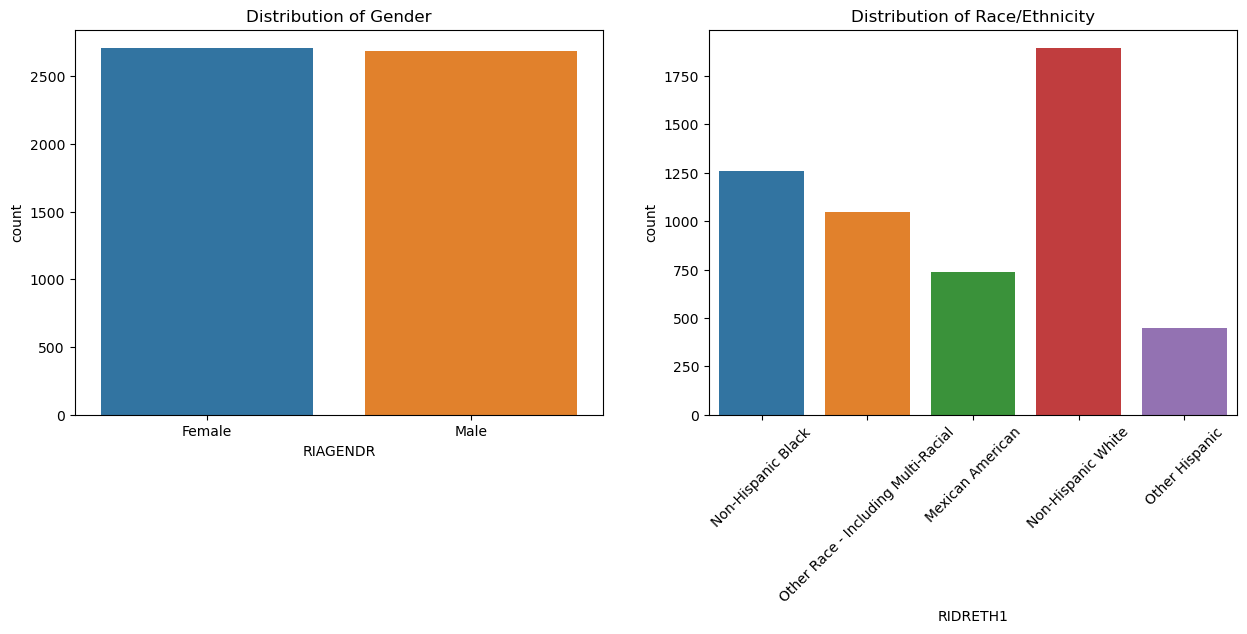

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms for continuous variables
full_data[['RIDAGEYR', 'BPXOSY1', 'BPXODI1', 'BPXOPLS1']].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Distribution of Age, Systolic and Diastolic Blood Pressure, and Pulse Rate')
plt.show()

# Count plots for categorical variables
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='RIAGENDR', data=full_data, ax=ax[0])
ax[0].set_title('Distribution of Gender')
sns.countplot(x='RIDRETH1', data=full_data, ax=ax[1])
ax[1].set_title('Distribution of Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()

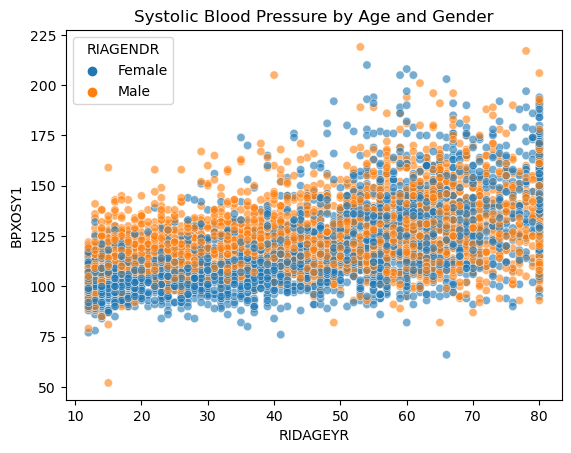

/var/folders/h0/lgffj5dx2vl72hsws4vy3bdm0000gn/T/ipykernel_5094/3576475381.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='RIDAGEYR', y='BPXOSY1', hue='RIAGENDR', estimator='mean', ci=None, data=full_data)


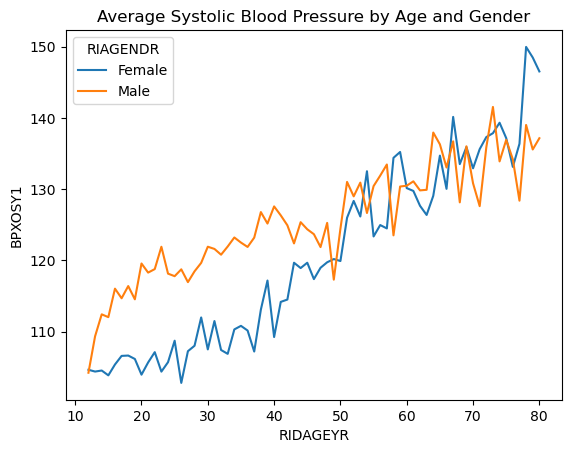

In [32]:
# Scatter plot of Systolic Blood Pressure by Age, colored by Gender
sns.scatterplot(x='RIDAGEYR', y='BPXOSY1', hue='RIAGENDR', alpha=0.6, data=full_data)
plt.title('Systolic Blood Pressure by Age and Gender')
plt.show()

# Line plot for more clarity on the trend
sns.lineplot(x='RIDAGEYR', y='BPXOSY1', hue='RIAGENDR', estimator='mean', ci=None, data=full_data)
plt.title('Average Systolic Blood Pressure by Age and Gender')
plt.show()

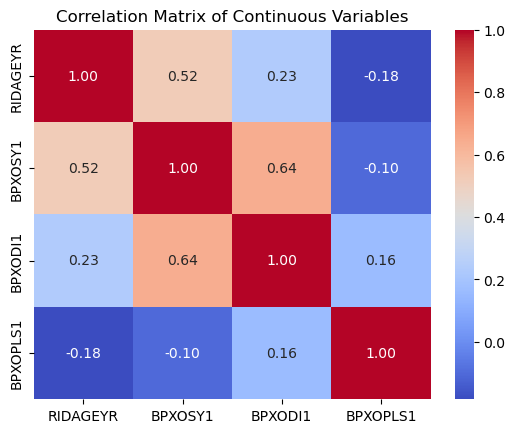

In [33]:
# Calculate correlations
corr_matrix = full_data[['RIDAGEYR', 'BPXOSY1', 'BPXODI1', 'BPXOPLS1']].corr()

# Heatmap of correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

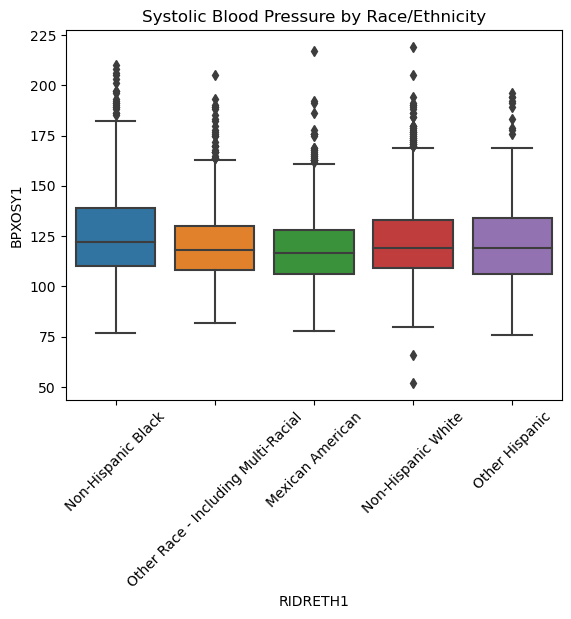

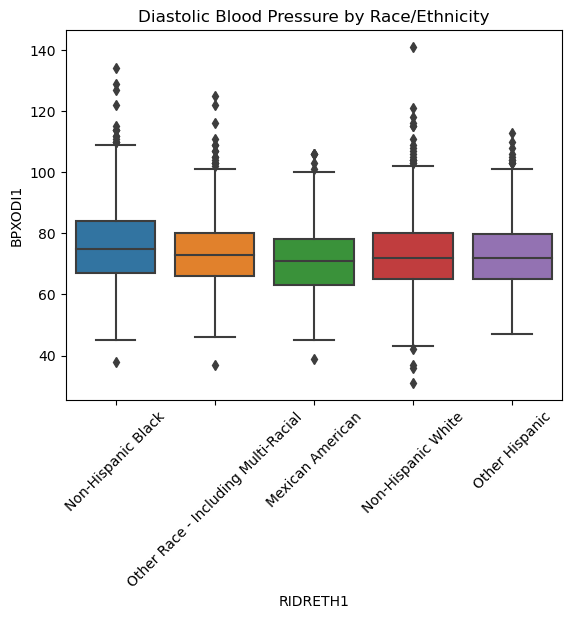

In [34]:
# Boxplot for Systolic Blood Pressure by Ethnicity
sns.boxplot(x='RIDRETH1', y='BPXOSY1', data=full_data)
plt.title('Systolic Blood Pressure by Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Diastolic Blood Pressure by Ethnicity
sns.boxplot(x='RIDRETH1', y='BPXODI1', data=full_data)
plt.title('Diastolic Blood Pressure by Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()


In [20]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Prepare data for logistic regression
X = full_data[['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP']]  # Predictor variables
y = full_data['Hypertension']  # Response variable

# Adding constant for logistic regression model
X = sm.add_constant(X)

# Fitting logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Summary of logistic regression results
logit_result.summary()


Optimization terminated successfully.
         Current function value: 0.460935
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Hypertension   No. Observations:                 5388
Model:                          Logit   Df Residuals:                     5383
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                 0.05735
Time:                        16:48:12   Log-Likelihood:                -2483.5
converged:                       True   LL-Null:                       -2634.6
Covariance Type:            nonrobust   LLR p-value:                 3.654e-64
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2914      1.234     -5.100      0.000      -8.709      -3.873
BMXWT         -0.0427      0.006     -6.950      0.000      -0.055      -0.031
BMXHT          0.0127      0.006      2.166      0.030       0.001       0.024
BMXWAIST       0.0881      0.006     15.187      0.000       0.077       0.099
BMXHIP        -0.0244      0.007     -3.676      0.000      -0.037      -0.011
==============================================================================
"""

In [25]:
# Prepare data for logistic regression
X = full_data[['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP', 'RIDAGEYR']].astype(float)
y = full_data['Hypertension']  # Response variable

# Adding constant for logistic regression model
X = sm.add_constant(X)

# Fitting logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Summary of logistic regression results
logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.410447
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Hypertension   No. Observations:                 5388
Model:                          Logit   Df Residuals:                     5382
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.1606
Time:                        19:04:34   Log-Likelihood:                -2211.5
converged:                       True   LL-Null:                       -2634.6
Covariance Type:            nonrobust   LLR p-value:                1.142e-180
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7892      1.319     -0.598      0.550      -3.375       1.797
BMXWT          0.0257      0.007      3.689      0.000       0.012       0.039
BMXHT         -0.0181      0.006     -2.872      0.004      -0.030      -0.006
BMXWAIST       0.0020      0.007      0.285      0.776      -0.012       0.016
BMXHIP        -0.0263      0.007     -3.834      0.000      -0.040      -0.013
RIDAGEYR       0.0551      0.003     21.030      0.000       0.050       0.060
==============================================================================
"""

In [27]:
X = full_data[['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP', 'RIDAGEYR']].astype(float)

# Create interaction terms between age and each body measurement variable
X['AGE_BMXWT'] = X['RIDAGEYR'] * X['BMXWT']
X['AGE_BMXHT'] = X['RIDAGEYR'] * X['BMXHT']
X['AGE_BMXWAIST'] = X['RIDAGEYR'] * X['BMXWAIST']
X['AGE_BMXHIP'] = X['RIDAGEYR'] * X['BMXHIP']

# Response variable
y = full_data['Hypertension']

# Adding a constant for logistic regression model
X = sm.add_constant(X)

# Fitting the logistic regression model with interaction terms
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.402696
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                 5388
Model:                          Logit   Df Residuals:                     5378
Method:                           MLE   Df Model:                            9
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.1765
Time:                        19:16:43   Log-Likelihood:                -2169.7
converged:                       True   LL-Null:                       -2634.6
Covariance Type:            nonrobust   LLR p-value:                2.377e-194
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -20.8015      5.059     -4.112      0.000     -30.716     -10.887
BMXWT           -0.0295

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for linear regression
X = cleaned_data[['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP']]  # Predictor variables
y_systolic = cleaned_data['Avg_SystolicBP']  # Response variable for systolic BP

# Splitting the data into training and testing sets
X_train, X_test, y_train_systolic, y_test_systolic = train_test_split(X, y_systolic, test_size=0.2, random_state=0)

# Fitting linear regression model for systolic blood pressure
lin_reg_systolic = LinearRegression()
lin_reg_systolic.fit(X_train, y_train_systolic)

# Predicting systolic blood pressure
y_pred_systolic = lin_reg_systolic.predict(X_test)

# Calculating RMSE and R^2 for the model
rmse_systolic = mean_squared_error(y_test_systolic, y_pred_systolic, squared=False)
r2_systolic = r2_score(y_test_systolic, y_pred_systolic)

rmse_systolic, r2_systolic

(18.517371955782757, 0.09045568535678272)